In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
import numpy as np
from tensorflow.keras import layers, models, callbacks

In [ ]:
# mount files from drive
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# importing csv file
url = "https://media.githubusercontent.com/media/dead96pool/datasets/main/creditcard.csv"
df = pd.read_csv(url)
print(df.shape)
display(df.head())

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# dataframe info

In [ ]:
display(df.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print(df.dtypes)
print(df.info())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      

In [ ]:
# selected columns
columns=["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13",
         "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount"]
# standardizing
# define standard scaler
scaler = StandardScaler()

# transform data
df[columns] = scaler.fit_transform(df[columns])


In [ ]:
display(df.describe())


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,-1.506872e-17,-9.580116e-18,-8.622104e-17,-5.189230e-18,3.832046e-17,9.979288e-18,1.237432e-17,-3.193372e-18,7.234983e-19,...,-3.642440e-18,3.193372e-18,8.781773e-18,9.580116e-18,-5.029561e-17,5.887780e-18,2.444925e-18,-7.908585e-18,2.913952e-17,0.001727
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.041527
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01,0.000000
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01,0.000000
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01,0.000000
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02,0.000000
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02,1.000000


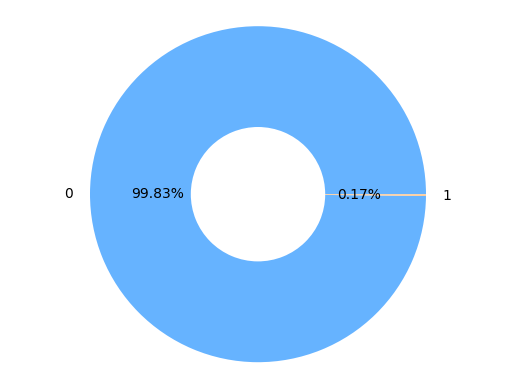

In [ ]:
class_count = df["Class"].value_counts()

plt.pie(class_count, labels=class_count.index, autopct='%1.2f%%', wedgeprops=dict(width=0.6), colors = ['#66b3ff', '#ffcc99'])
plt.axis('equal')
plt.show()

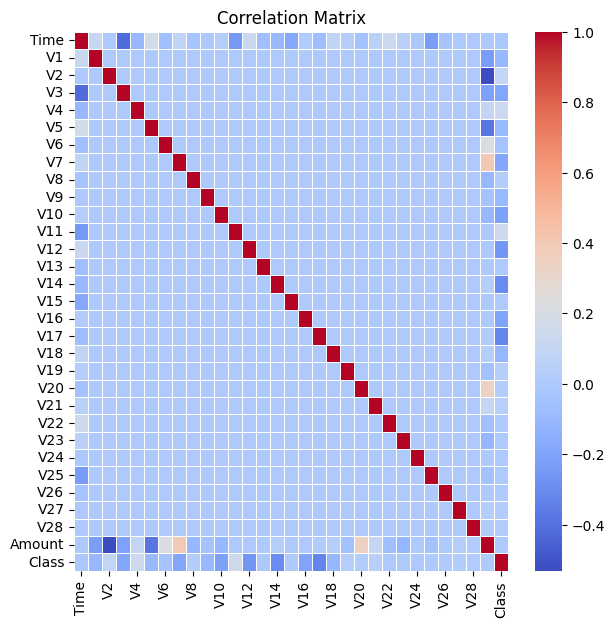

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(7, 7))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.6)
plt.title('Correlation Matrix')
plt.show()

# Feedfoward Neural Network (FNN)

In [ ]:
# target class
features_df = df.drop(["Time", "Class"], axis = 1)
target_df = df["Class"]

In [ ]:
# test-train data split
# 80-20

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=42, stratify = target_df)


In [ ]:
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# ANN model
model = Sequential()
#model.add(Dense(29, activation='relu', kernel_initializer='uniform'))
model.add(Dense(255, activation='relu', input_dim=29, kernel_initializer='uniform'))

model.add(Dense(127, activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.5))
model.add(Dense(63, activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
5697/5697 [==============================] - 13s 2ms/step - loss: 0.0073 - accuracy: 0.9989 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 2/10
5697/5697 [==============================] - 11s 2ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 3/10
5697/5697 [==============================] - 12s 2ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 4/10
5697/5697 [==============================] - 11s 2ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 5/10
5697/5697 [==============================] - 11s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 6/10
5697/5697 [==============================] - 12s 2ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 7/10
5697/5697 [==============================] - 11s 2ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0055 - val_ac

In [ ]:
# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Apply threshold of 0.5 for binary classification


1781/1781 [==============================] - 2s 968us/step


In [ ]:
# batch 32
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[56849    15]
 [   24    74]]
Accuracy Score :  0.9993153330290369

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.76      0.79        98

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# confusion matrix


# CNN

In [ ]:
# target class
features_df = df.drop(["Time", "Class"], axis=1)
target_df = df["Class"]

# Test-train data split (80-20)
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=42, stratify=target_df)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape data for 1D CNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
# Build 1D CNN model
model = Sequential()

model.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv1D(128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [ ]:

# Compile the model
#optimizer = Adam(lr=0.001)
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
7121/7121 [==============================] - 56s 8ms/step - loss: 0.0086 - accuracy: 0.9989 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 2/10
7121/7121 [==============================] - 55s 8ms/step - loss: 0.0056 - accuracy: 0.9992 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 3/10
7121/7121 [==============================] - 49s 7ms/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 4/10
7121/7121 [==============================] - 50s 7ms/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9992
Epoch 5/10
7121/7121 [==============================] - 50s 7ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0054 - val_accuracy: 0.9994
Epoch 6/10
7121/7121 [==============================] - 54s 8ms/step - loss: 0.0061 - accuracy: 0.9991 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 7/10
7121/7121 [==============================] - 51s 7ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0049 - val_ac

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

1781/1781 [==============================] - 4s 2ms/step
Confusion Matrix:
 [[56851    13]
 [   39    59]]
Accuracy Score :  0.9990871107053826

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.60      0.69        98

    accuracy                           1.00     56962
   macro avg       0.91      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



# transformer model

In [17]:

# test train split 80-20
features_df = df.drop(["Time", "Class"], axis = 1)
target_df = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=42, stratify=target_df)


In [14]:
print(f"X_train shape: {X_train.shape}, Type: {type(X_train)}")
print(f"y_train shape: {y_train.shape}, Type: {type(y_train)}")
print(f"X_test shape: {X_test.shape}, Type: {type(X_test)}")
print(f"y_test shape: {y_test.shape}, Type: {type(y_test)}")



X_train shape: (227845, 29), Type: <class 'pandas.core.frame.DataFrame'>
y_train shape: (227845,), Type: <class 'pandas.core.series.Series'>
X_test shape: (56962, 29), Type: <class 'pandas.core.frame.DataFrame'>
y_test shape: (56962,), Type: <class 'pandas.core.series.Series'>


In [18]:
# changing dataframe to numpy
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [19]:
print(f"X_train shape: {X_train.shape}, Type: {type(X_train)}")
print(f"y_train shape: {y_train.shape}, Type: {type(y_train)}")
print(f"X_test shape: {X_test.shape}, Type: {type(X_test)}")
print(f"y_test shape: {y_test.shape}, Type: {type(y_test)}")

X_train shape: (227845, 29), Type: <class 'numpy.ndarray'>
y_train shape: (227845,), Type: <class 'numpy.ndarray'>
X_test shape: (56962, 29), Type: <class 'numpy.ndarray'>
y_test shape: (56962,), Type: <class 'numpy.ndarray'>


In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
print(f"X_train shape: {X_train.shape}, Type: {type(X_train)}")
print(f"y_train shape: {y_train.shape}, Type: {type(y_train)}")
print(f"X_test shape: {X_test.shape}, Type: {type(X_test)}")
print(f"y_test shape: {y_test.shape}, Type: {type(y_test)}")

X_train shape: (227845, 29), Type: <class 'numpy.ndarray'>
y_train shape: (227845,), Type: <class 'numpy.ndarray'>
X_test shape: (56962, 29), Type: <class 'numpy.ndarray'>
y_test shape: (56962,), Type: <class 'numpy.ndarray'>


In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.utils import class_weight
import numpy as np

# Data preprocessing
# ...

# Calculate class weights to handle imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Model architecture
inputs = layers.Input(shape=(29,1))  # Assuming 29 features

# Positional encoding
positional_encoding = layers.Embedding(input_dim=29, output_dim=29)(tf.range(start=0, limit=29, delta=1))
inputs_with_position = inputs + positional_encoding

# Transformer layers
attention = layers.MultiHeadAttention(num_heads=2, key_dim=2)(inputs_with_position, inputs_with_position, inputs_with_position)
attention = layers.Dropout(0.1)(attention)
out = layers.LayerNormalization(epsilon=1e-6)(inputs + attention)

# Global average pooling
out = layers.GlobalAveragePooling1D()(out)

# Output layer for binary classification
output = layers.Dense(1, activation='sigmoid')(out)

model = models.Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model training
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Model evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")


Epoch 1/10
3561/3561 [==============================] - 43s 11ms/step - loss: 0.0088 - accuracy: 0.9978 - val_loss: 0.0058 - val_accuracy: 0.9986
Epoch 2/10
3561/3561 [==============================] - 41s 11ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.0081 - val_accuracy: 0.9983
Epoch 3/10
3561/3561 [==============================] - 47s 13ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.0067 - val_accuracy: 0.9983
Epoch 4/10
3561/3561 [==============================] - 40s 11ms/step - loss: 0.0064 - accuracy: 0.9984 - val_loss: 0.0055 - val_accuracy: 0.9985
Epoch 5/10
3561/3561 [==============================] - 59s 17ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.0059 - val_accuracy: 0.9986
Epoch 6/10
3561/3561 [==============================] - 39s 11ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.0061 - val_accuracy: 0.9985
Epoch 7/10
3561/3561 [==============================] - 41s 12ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.0061 -

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you already have the trained model stored in the 'model' variable

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary values (0 or 1) based on a threshold (e.g., 0.5)
y_pred_binary = (y_pred > 0.5).astype(int)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

# Optionally, print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

1781/1781 [==============================] - 5s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.27      0.40        98

    accuracy                           1.00     56962
   macro avg       0.89      0.63      0.70     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:
[[56857     7]
 [   72    26]]


# Resampling using SMOTE

# random sampler